# Import des modules

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extrait SIRH

- Calcul des statistiques descriptives
- Objectif : faire ressortir des différences clés entre les employés

In [29]:
sirh = pd.read_csv('ExtraitSIRH.csv')

# Extrait SIRH - Graphiques

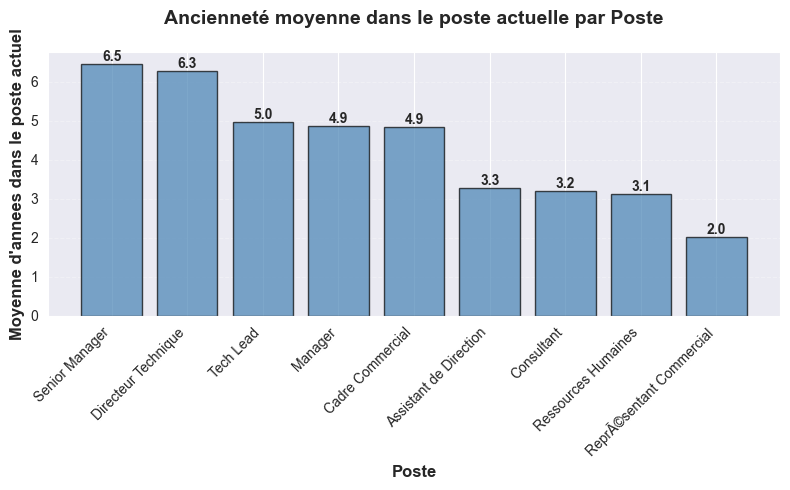

=== Statistiques du ratio de mutation interne ===

=== Interprétation ===
• Ratio proche de 100% : Employé n'a jamais changé de poste
• Ratio proche de 0 : Employé a changé de poste récemment
• Ratio faible = Forte mobilité interne
Ratio moyen: 59.61%
Ratio médian: 66.67%
Ratio min: 0.00%
Ratio max: 100.00%
1. Ancienneté moyenne des employés sans mobilité (ratio entre 0,8 et 1): 8.7 ans
2. Ancienneté moyenne des employés avec mobilité (ratio < 0,8): 7.5 ans
3. Corrélation entre ancienneté et ratio: 0.027
   (Plus proche de 0 = pas de lien, proche de 1 = lien positif)


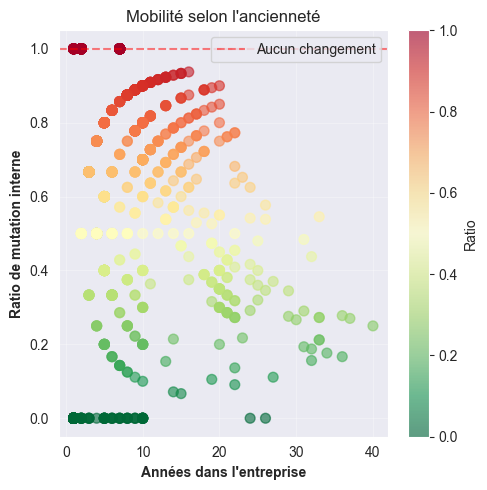

=== ANALYSE DE CORRÉLATION ===

Corrélation de Pearson: 0.514
Corrélation de Spearman: 0.464
Augmentation moyenne par année: 395€
Revenu de base estimé (0 ans): 3,733€


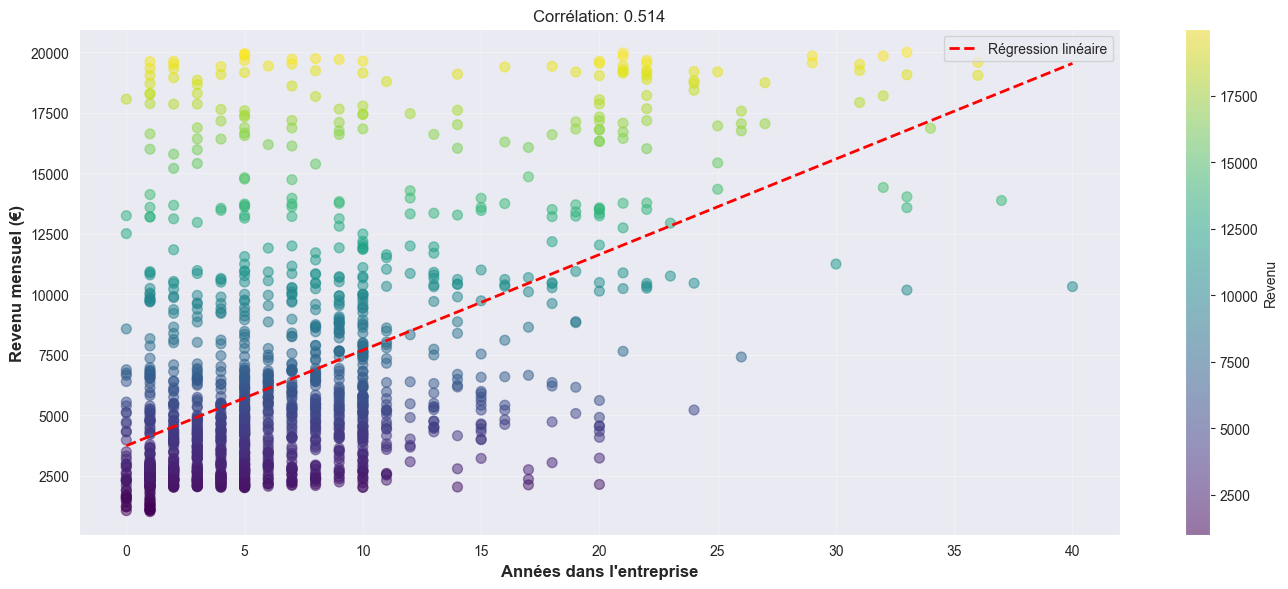

In [30]:
#------------------------
# Moyenne d'annees dans le poste actuel par poste
#------------------------

moyennes = sirh.groupby('poste')['annees_dans_le_poste_actuel'].mean()
# Trier par valeur décroissante (optionnel)
moyennes = moyennes.sort_values(ascending=False)

# Créer le graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(moyennes.index, moyennes.values,
               color='steelblue', edgecolor='black', alpha=0.7)

# Personnalisation
plt.xlabel('Poste', fontsize=12, fontweight='bold')
plt.ylabel('Moyenne d\'annees dans le poste actuel', fontsize=12, fontweight='bold')
plt.title('Ancienneté moyenne dans le poste actuelle par Poste', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#------------------------
# ratio de mutation interne
#------------------------

# Calculer le ratio de mutation interne
# Ratio = années dans le poste actuel / années dans l'entreprise
sirh['ratio_mutation_interne'] = sirh['annees_dans_le_poste_actuel'] / sirh['annees_dans_l_entreprise']
sirh['ratio_mutation_interne'] = sirh['ratio_mutation_interne'].replace([np.inf, -np.inf], np.nan)

# Afficher quelques statistiques
print("=== Statistiques du ratio de mutation interne ===")
print("\n=== Interprétation ===")
print("• Ratio proche de 100% : Employé n'a jamais changé de poste")
print("• Ratio proche de 0 : Employé a changé de poste récemment")
print("• Ratio faible = Forte mobilité interne")

print(f"Ratio moyen: {sirh['ratio_mutation_interne'].mean():.2%}")
print(f"Ratio médian: {sirh['ratio_mutation_interne'].median():.2%}")
print(f"Ratio min: {sirh['ratio_mutation_interne'].min():.2%}")
print(f"Ratio max: {sirh['ratio_mutation_interne'].max():.2%}")

print(f"1. Ancienneté moyenne des employés sans mobilité (ratio entre 0,8 et 1): "
      f"{sirh[(sirh['ratio_mutation_interne'] >= 0.8) & (sirh['ratio_mutation_interne'] < 1)]['annees_dans_l_entreprise'].mean():.1f} ans")
print(f"2. Ancienneté moyenne des employés avec mobilité (ratio < 0,8): "
      f"{sirh[sirh['ratio_mutation_interne'] < 0.8]['annees_dans_l_entreprise'].mean():.1f} ans")
print(f"3. Corrélation entre ancienneté et ratio: "
      f"{sirh['annees_dans_l_entreprise'].corr(sirh['ratio_mutation_interne']):.3f}")
print("   (Plus proche de 0 = pas de lien, proche de 1 = lien positif)")


# Créer une figure avec plusieurs sous-graphiques
plt.figure(figsize=(5, 5))

plt.scatter(sirh['annees_dans_l_entreprise'], sirh['ratio_mutation_interne'],
                     alpha=0.6, c=sirh['ratio_mutation_interne'], cmap='RdYlGn_r', s=50)
plt.xlabel('Années dans l\'entreprise', fontweight='bold')
plt.ylabel('Ratio de mutation interne', fontweight='bold')
plt.title('Mobilité selon l\'ancienneté')
plt.grid(alpha=0.3)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Aucun changement')
plt.colorbar(label='Ratio')
plt.legend()
plt.tight_layout()
plt.show()

################################################

# Calculer la corrélation
correlation = sirh['revenu_mensuel'].corr(sirh['annees_dans_l_entreprise'])
correlation_spearman = sirh['revenu_mensuel'].corr(sirh['annees_dans_l_entreprise'], method='spearman')

print("=== ANALYSE DE CORRÉLATION ===\n")
print(f"Corrélation de Pearson: {correlation:.3f}")
print(f"Corrélation de Spearman: {correlation_spearman:.3f}")

z = np.polyfit(sirh['annees_dans_l_entreprise'], sirh['revenu_mensuel'], 1)
print(f"Augmentation moyenne par année: {z[0]:,.0f}€")
print(f"Revenu de base estimé (0 ans): {z[1]:,.0f}€")

fig, axes = plt.subplots(figsize=(14, 6))
plt.scatter(sirh['annees_dans_l_entreprise'], sirh['revenu_mensuel'],
                     alpha=0.5, s=50, c=sirh['revenu_mensuel'], cmap='viridis')

# Ajouter la ligne de régression
z = np.polyfit(sirh['annees_dans_l_entreprise'], sirh['revenu_mensuel'], 1)
p = np.poly1d(z)
x_line = np.linspace(sirh['annees_dans_l_entreprise'].min(),
                     sirh['annees_dans_l_entreprise'].max(), 100)
plt.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Régression linéaire')

plt.xlabel('Années dans l\'entreprise', fontweight='bold', fontsize=12)
plt.ylabel('Revenu mensuel (€)', fontweight='bold', fontsize=12)
plt.title(f'Corrélation: {correlation:.3f}', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.colorbar(label='Revenu')
plt.tight_layout()
plt.show()

sirh.drop((['ratio_mutation_interne']), axis=1, inplace=True)


/var/folders/hm/xkkm6rp16357jgy5gn4qpdnw0000gn/T/ipykernel_8016/3930238920.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_par_tranche = sirh.groupby('tranche_experience')['revenu_mensuel'].agg([


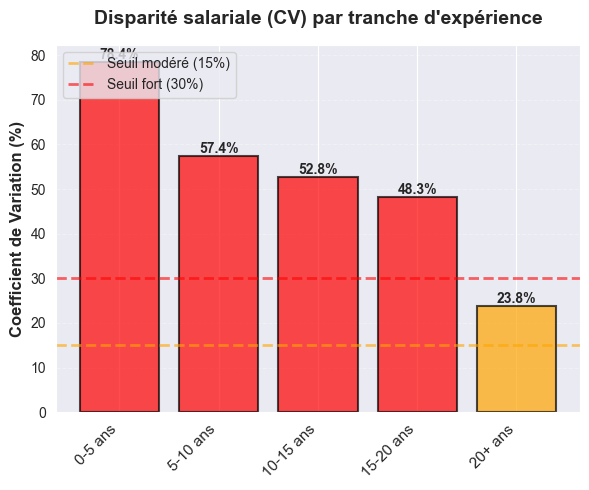

In [31]:
# Créer des tranches d'expérience
bins = [0, 5, 10, 15, 20, 100]
labels = ['0-5 ans', '5-10 ans', '10-15 ans', '15-20 ans', '20+ ans']
sirh['tranche_experience'] = pd.cut(sirh['annees_dans_l_entreprise'], bins=bins, labels=labels)

# Calculer les statistiques par tranche
stats_par_tranche = sirh.groupby('tranche_experience')['revenu_mensuel'].agg([
    ('mean', 'mean'),
    ('std', 'std')
]).round(0)

# Calculer le coefficient de variation (CV)
stats_par_tranche['cv'] = (stats_par_tranche['std'] / stats_par_tranche['mean'] * 100).round(1)

# Créer le graphique
fig, ax = plt.figure(figsize=(6, 5)), plt.gca()

# Définir les couleurs selon le niveau de disparité
colors_cv = ['green' if cv < 15 else 'orange' if cv < 30 else 'red'
             for cv in stats_par_tranche['cv']]

bars = ax.bar(range(len(stats_par_tranche['cv'])), stats_par_tranche['cv'],
              color=colors_cv, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Coefficient de Variation (%)', fontweight='bold', fontsize=12)
ax.set_title('Disparité salariale (CV) par tranche d\'expérience',
             fontweight='bold', fontsize=14, pad=15)

# Ajouter les lignes de seuil
ax.axhline(y=15, color='orange', linestyle='--', alpha=0.6, linewidth=2, label='Seuil modéré (15%)')
ax.axhline(y=30, color='red', linestyle='--', alpha=0.6, linewidth=2, label='Seuil fort (30%)')
ax.legend(fontsize=10, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Ajouter les valeurs sur les barres
for bar, val in zip(bars, stats_par_tranche['cv']):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('images/disparite_cv_experience.png', dpi=300, bbox_inches='tight')
plt.show()

# Nettoyer
sirh.drop(['tranche_experience'], axis=1, inplace=True)

# Extrait Evaluation Performance

- Calcul des statistiques descriptives
- Objectif : faire ressortir des différences clés entre les employés

In [32]:
eval_perf = pd.read_csv('ExtraitEvaluationsPerformance.csv')

# Extrait Sondage

- Calcul des statistiques descriptives
- Objectif : faire ressortir des différences clés entre les employés

In [33]:
sondage = pd.read_csv('ExtraitSondage.csv')

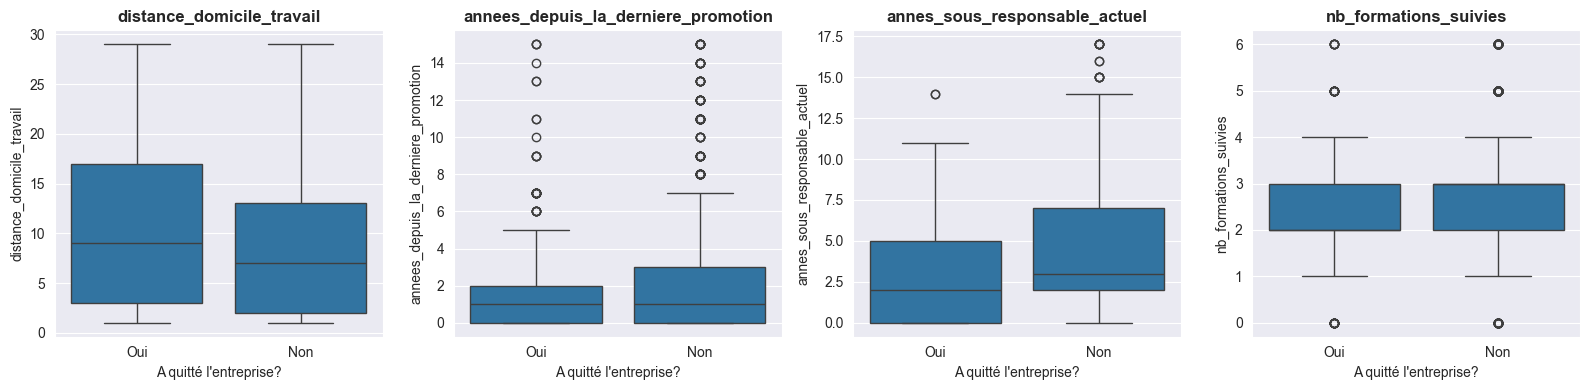

In [34]:
#print(sondage['a_quitte_l_entreprise'].value_counts())

# Liste des colonnes à comparer
colonnes_a_comparer = ['distance_domicile_travail', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'nb_formations_suivies']

# Créer une figure avec 4 subplots sur 1 ligne
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, col in enumerate(colonnes_a_comparer):
    sns.boxplot(x='a_quitte_l_entreprise', y=col, data=sondage, ax=axes[i])
    axes[i].set_xticks([0, 1])
    axes[i].set_title(f"{col}", fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("A quitté l'entreprise?")

plt.tight_layout()
plt.show()

# Création du fichier central

- Identifier les colonnes permettant de réaliser des jointures entre les 3 fichiers :
    - ExtraitSIRH = id_employee
    - ExtraitEvaluationsPerformance = eval_number
    - ExtraitSondage = code_sondage


In [35]:
###########
# PANDAS
##########

# Modifier des donnes de la colonne "eval_number" de "eval_perf"
eval_perf['eval_number'] = eval_perf['eval_number'].str.replace('E_', '', regex=False).astype(int)
#print(eval_perf['eval_number'])

fc_temp = pd.merge(sirh, eval_perf, left_on="id_employee", right_on="eval_number")
fc = pd.merge(fc_temp, sondage, left_on="id_employee", right_on="code_sondage")
fc.head(5)

fc.drop((['eval_number','code_sondage']), axis=1, inplace=True)

##########
# SQL
##########


# Colonnes à traiter
- statut_marital, poste => remplacer les caracteres illisibles
- nombre_heures_travailles, nombre_employee_sous_responsabilite, ayant_enfants => A supprimer car données identiques

In [36]:
# Nom de colonne erronees
fc.rename(columns={'augementation_salaire_precedente': 'augmentation_salaire_precedente'}, inplace=True)
fc.rename(columns={'annee_experience_totale': 'annees_experience_totale'}, inplace=True)

# Données uniques
print(f"Colonnes avec des données uniques: {fc.columns[fc.nunique() == 1].tolist()}")
fc.drop((['nombre_heures_travailless','nombre_employee_sous_responsabilite','ayant_enfants']), axis=1, inplace=True)

# Données erronees
#print(fc.groupby(['statut_marital']).size().sort_values(ascending=False))
#print(fc.groupby(['poste']).size().sort_values(ascending=False))

for col in fc.select_dtypes(include='object').columns:
    fc[col] = fc[col].str.replace('Ã©', 'e', regex=False)

print(fc.groupby(['statut_marital']).size().sort_values(ascending=False))
print(fc.groupby(['poste']).size().sort_values(ascending=False))

# Données non valides
fc['augmentation_salaire_precedente'] = fc['augmentation_salaire_precedente'].str.replace(' %', '', regex=False).astype(int)

# Données redondantes
fc.drop((['departement']), axis=1, inplace=True)

# Satisfaction Globale
fc["satisfaction_globale"] = (fc["satisfaction_employee_environnement"]+fc["satisfaction_employee_nature_travail"]+fc["satisfaction_employee_equipe"]+fc["satisfaction_employee_equilibre_pro_perso"])*100/16


Colonnes avec des données uniques: ['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants']
statut_marital
Marie(e)       673
Celibataire    470
Divorce(e)     327
dtype: int64
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Representant Commercial     83
Directeur Technique         80
Ressources Humaines         52
dtype: int64


# Comparaison des colonnes
- Identifier le profil type d'un salarié qui a démissioné

/var/folders/hm/xkkm6rp16357jgy5gn4qpdnw0000gn/T/ipykernel_8016/3129315447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='a_quitte_l_entreprise', y=col, data=fc, ax=axes[i], palette='Set2')
/var/folders/hm/xkkm6rp16357jgy5gn4qpdnw0000gn/T/ipykernel_8016/3129315447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='a_quitte_l_entreprise', y=col, data=fc, ax=axes[i], palette='Set2')
/var/folders/hm/xkkm6rp16357jgy5gn4qpdnw0000gn/T/ipykernel_8016/3129315447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='a_quitte_l_entrepr

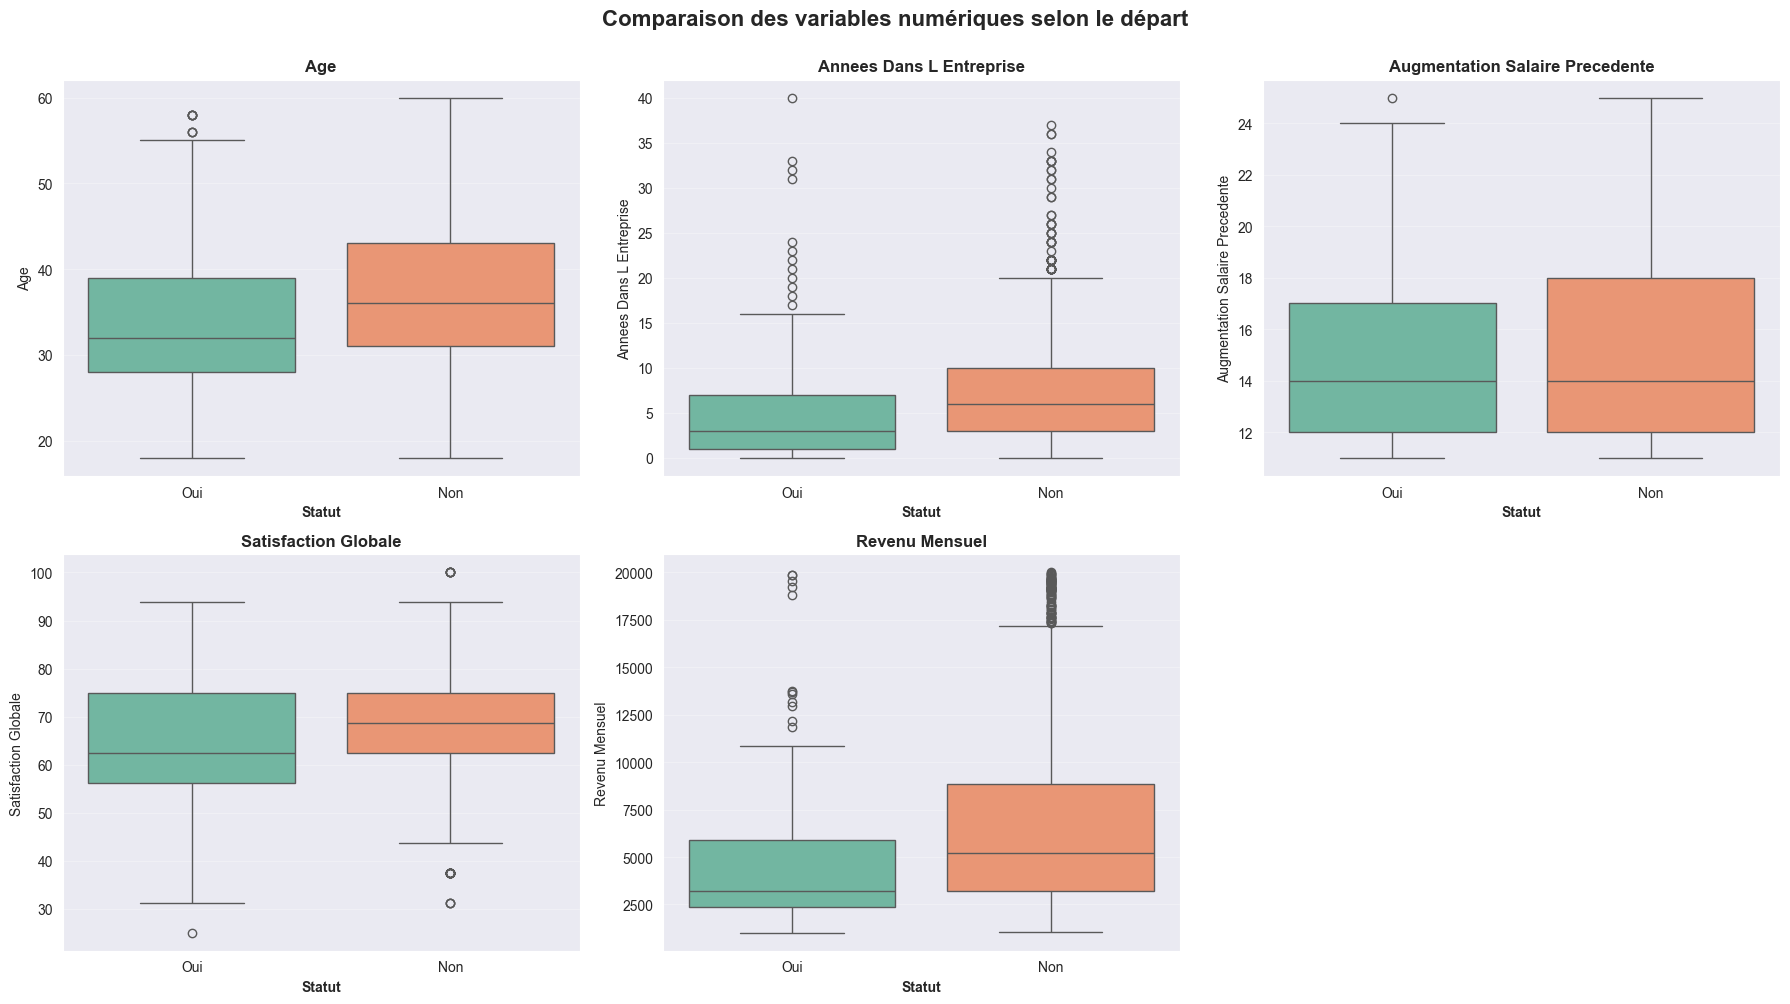

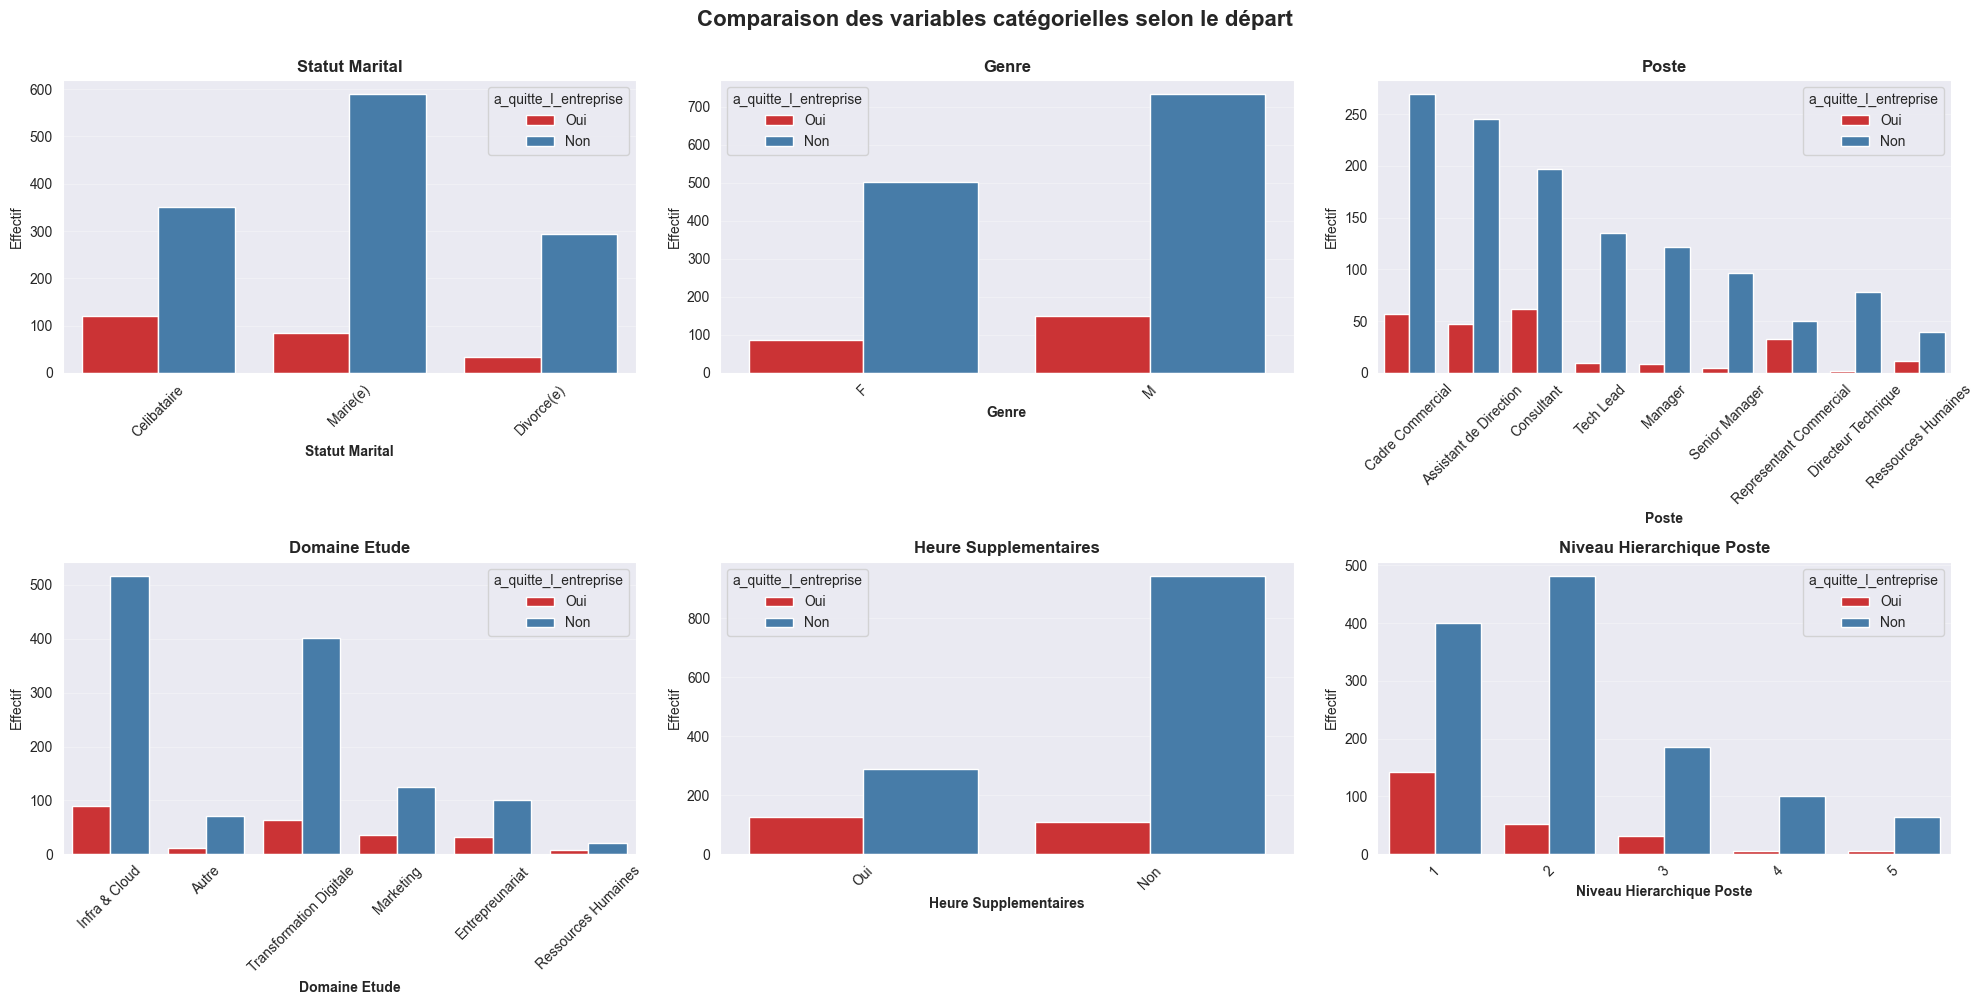

In [37]:
# ============= VARIABLES NUMÉRIQUES =============
colonnes_numeriques = ['age', 'annees_dans_l_entreprise', 'augmentation_salaire_precedente',
                       'satisfaction_globale', 'revenu_mensuel']

# Créer une figure avec 5 subplots sur 2 lignes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(x='a_quitte_l_entreprise', y=col, data=fc, ax=axes[i], palette='Set2')
    axes[i].set_xticks([0, 1])
    axes[i].set_title(f"{col.replace('_', ' ').title()}", fontweight='bold', fontsize=12)
    axes[i].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    axes[i].set_xlabel("Statut", fontsize=10, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

# Masquer le dernier subplot vide
axes[5].axis('off')

plt.suptitle('Comparaison des variables numériques selon le départ',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


# ============= VARIABLES CATÉGORIELLES =============
colonnes_categoriques = ['statut_marital', 'genre', 'poste', 'domaine_etude',
                         'heure_supplementaires', 'niveau_hierarchique_poste']

# Créer une figure avec 6 subplots sur 2 lignes
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(colonnes_categoriques):
    sns.countplot(x=col, hue='a_quitte_l_entreprise', data=fc, ax=axes[i], palette='Set1')
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=10, fontweight='bold')
    axes[i].set_ylabel("Effectif", fontsize=10)
    axes[i].set_title(f"{col.replace('_', ' ').title()}", fontweight='bold', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Comparaison des variables catégorielles selon le départ',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Export CSV

In [38]:
fc.to_csv('fc.csv', index=False)